## Inference - Pose Estimation

In [1]:
import sys
sys.path.append("../")

from lib.phonology.handshape import *
from lib.phonology.temporal import *
from lib.phonology.classifier import *

2024-02-21 20:23:00.019912: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 20:23:00.270410: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-21 20:23:00.273779: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-21 20:23:01.479250: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
from glob import glob
import cv2
from tqdm import tqdm
import mediapipe as mp


mp_holistic = mp.solutions.holistic

for video_path in tqdm(glob('../../data/corpus/*.mp4')):
    print(video_path) 
    
    camera = cv2.VideoCapture(video_path)
    
    PARAMS = ['LOCATION', 'ORIENTATION', 'FINGER_SELECTION', 'Path', 'Spacial', 'Temporal', 'Setting']
    LEFT = HandshapePhonology('Left')
    RIGHT = HandshapePhonology('Right')
    TEMPORAL = TemporalPhonology(PARAMS)

    idx = 0
        
    ret, frame = camera.read()

    with mp_holistic.Holistic(min_detection_confidence=0.1, min_tracking_confidence=0.1) as holistic:

        while camera.isOpened() and ret == True:

            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            results = holistic.process(image)
            
            RIGHT.getJointInfo(results.right_hand_landmarks, results.pose_landmarks, PARAMS)
            LEFT.getJointInfo(results.left_hand_landmarks, results.pose_landmarks, PARAMS)
            INFO = TEMPORAL.getTemporalInformation(LEFT, RIGHT)
            
            
            ret, frame = camera.read()
            
    fname = video_path.split('/')[-1].split('.')[0]
    print(f'outputs/{fname}.csv')
    pd.DataFrame.from_records(TEMPORAL.HISTORY).to_csv(f'outputs/{fname}.csv', index=False)

            
    

  0%|          | 0/3395 [00:00<?, ?it/s]

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


../../data/corpus/SAÇMA_0.mp4


  0%|          | 1/3395 [00:02<2:44:23,  2.91s/it]

outputs/SAÇMA_0.csv
../../data/corpus/YÜZME_0.mp4


  0%|          | 2/3395 [00:05<2:49:46,  3.00s/it]

outputs/YÜZME_0.csv
../../data/corpus/ANLAŞMA_1.mp4


  0%|          | 3/3395 [00:09<3:08:47,  3.34s/it]

outputs/ANLAŞMA_1.csv
../../data/corpus/ANLAŞMAK_0.mp4


  0%|          | 4/3395 [00:13<3:12:38,  3.41s/it]

outputs/ANLAŞMAK_0.csv
../../data/corpus/DOLMAK_0.mp4


  0%|          | 5/3395 [00:15<2:55:47,  3.11s/it]

outputs/DOLMAK_0.csv
../../data/corpus/BENCE_0.mp4


  0%|          | 6/3395 [00:18<2:48:39,  2.99s/it]

outputs/BENCE_0.csv
../../data/corpus/MIMAR_0.mp4


  0%|          | 7/3395 [00:21<2:43:06,  2.89s/it]

outputs/MIMAR_0.csv
../../data/corpus/VÜCUT _1.mp4


  0%|          | 8/3395 [00:25<3:14:16,  3.44s/it]

outputs/VÜCUT _1.csv
../../data/corpus/EKIM_1.mp4


  0%|          | 9/3395 [00:28<2:54:35,  3.09s/it]

outputs/EKIM_1.csv
../../data/corpus/NEFIS_0.mp4


  0%|          | 10/3395 [00:31<2:50:22,  3.02s/it]

outputs/NEFIS_0.csv
../../data/corpus/BOŞ VERMEK_0.mp4


  0%|          | 11/3395 [00:33<2:39:56,  2.84s/it]

outputs/BOŞ VERMEK_0.csv
../../data/corpus/TEŞEKKÜR_1.mp4


  0%|          | 12/3395 [00:36<2:41:03,  2.86s/it]

outputs/TEŞEKKÜR_1.csv
../../data/corpus/EL SALLAMAK_0.mp4


  0%|          | 13/3395 [00:38<2:30:19,  2.67s/it]

outputs/EL SALLAMAK_0.csv
../../data/corpus/KAR_0.mp4


  0%|          | 14/3395 [00:42<2:51:57,  3.05s/it]

outputs/KAR_0.csv
../../data/corpus/ŞAMPIYON_0.mp4


  0%|          | 14/3395 [00:44<3:00:21,  3.20s/it]


KeyboardInterrupt: 

## Analyze - Dominance

In [1]:
import glob

import pandas as pd
from tqdm import tqdm

POSE = glob.glob('outputs/*.csv')

In [4]:
dfs = []

for doc_name in POSE:
    
    df = pd.read_csv(doc_name)
    
    df['LEXICON'] = doc_name.split('/')[1].split('.')[0]
    
    dfs.append(df)

In [5]:
DF_POSE = pd.concat(dfs)

In [6]:
COLS = DF_POSE.columns.to_list()
COLS.remove('LEXICON')

In [7]:
DF_POSE = DF_POSE[['LEXICON']+COLS]

In [8]:
import sys
sys.path.append("../")
from lib.phonology.sign_utils import NUMERICAL

COL_SR = pd.Series(NUMERICAL)

RIGHT_COLS = COL_SR[COL_SR.apply(lambda x: 'RIGHT' in x)]
LEFT_COLS = COL_SR[COL_SR.apply(lambda x: 'LEFT' in x)]

In [9]:
def calculateMeanDiff(x): return x.diff().abs().mean()

In [10]:
DF_POSE

/home/karahan/anaconda3/lib/python3.9/site-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/home/karahan/anaconda3/lib/python3.9/site-packages/IPython/core/formatters.py:345: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  return method()


,LEXICON,RIGHT_THUMB_ANGLE_PIP,RIGHT_THUMB_ANGLE_DIP,RIGHT_THUMB_ANGLE_WRST_PIP,RIGHT_THUMB_ANGLE_WRST_DIP,RIGHT_THUMB_ANGLE_PIP_SELECT,RIGHT_THUMB_ANGLE_DIP_SELECT,RIGHT_THUMB_ANGLE_WRST_PIP_SELECT,RIGHT_THUMB_ANGLE_WRST_DIP_SELECT,RIGHT_THUMB_ANGLE_PIP_CURVE,...,IN_FRONT_LABEL,IN_FRONT_SCORE,ABOVE/BELOW_LABEL,ABOVE/BELOW_SCORE,LEFT_SETTING_LABEL,LEFT_SETTING_SCORE,LEFT_REPETITION_LABEL,LEFT_REPETITION_SCORE,LEFT_CURVE_LABEL,LEFT_CURVE_SCORE
0,ARAP_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ARAP_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ARAP_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARAP_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ARAP_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,SAHTE _0,0.870261,0.912499,0.191906,0.1302,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,SAHTE _0,0.870261,0.912499,0.191906,0.1302,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
68,SAHTE _0,0.870261,0.912499,0.191906,0.1302,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
69,SAHTE _0,0.870261,0.912499,0.191906,0.1302,True,True,False,False,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
RIGHT_HAND_ABS_DIFF =  DF_POSE[['LEXICON']+RIGHT_COLS.to_list()].groupby('LEXICON').apply(calculateMeanDiff).sum(1)
LEFT_HAND_ABS_DIFF =  DF_POSE[['LEXICON']+LEFT_COLS.to_list()].groupby('LEXICON').apply(calculateMeanDiff).sum(1)

In [12]:
HAND_MEAN = pd.DataFrame({
    'RIGHT': RIGHT_HAND_ABS_DIFF,
    'LEFT': LEFT_HAND_ABS_DIFF
}).reset_index()

In [13]:
HAND_MEAN['HAND_DIFF'] = HAND_MEAN['RIGHT'] - HAND_MEAN['LEFT']

<Axes: ylabel='Density'>

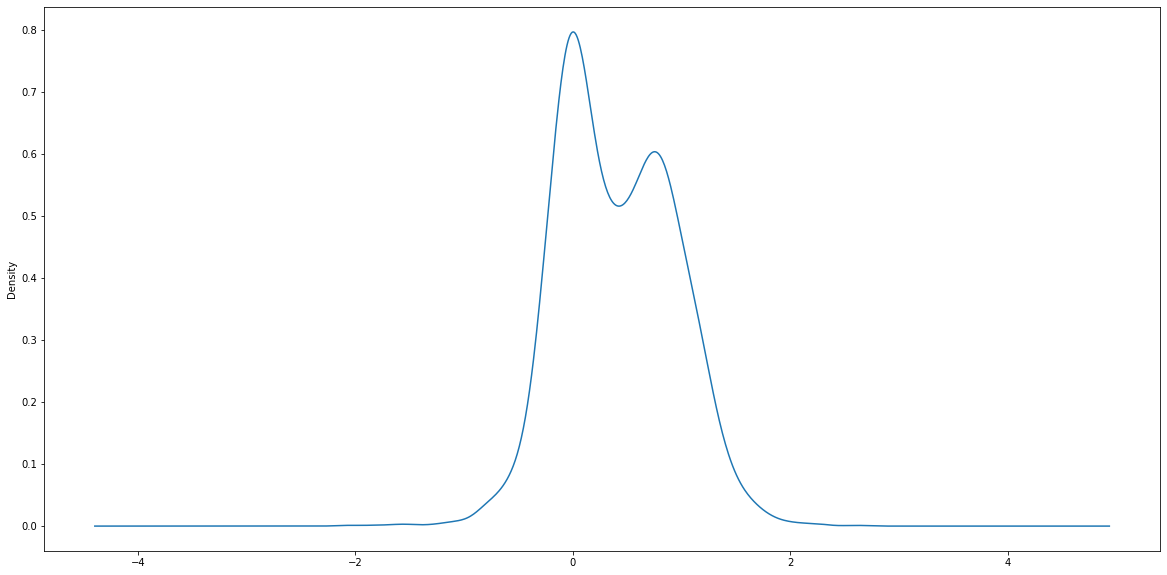

In [14]:
# TODO: Can add to signer based dominance summary is 
HAND_MEAN.HAND_DIFF.sort_values().plot(kind='density', figsize=(20,10)) # For explaining hand domination

In [15]:
HAND_MEAN[HAND_MEAN.HAND_DIFF>0][HAND_MEAN.LEFT>0].sort_values(by='HAND_DIFF',ascending=False)

/tmp/ipykernel_7583/1188462947.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  HAND_MEAN[HAND_MEAN.HAND_DIFF>0][HAND_MEAN.LEFT>0].sort_values(by='HAND_DIFF',ascending=False)


,LEXICON,RIGHT,LEFT,HAND_DIFF
441,BILARDO_0,2.492681,0.872910,1.619771
2364,SIKMAK_1,1.749761,0.310830,1.438931
1717,KURS_1,1.739100,0.446854,1.292246
744,DEĞIRMEN_1,2.287144,1.034021,1.253124
684,DAVUL_0,1.782061,0.535796,1.246264
...,...,...,...,...
1941,NAMAZ_0,0.718088,0.716674,0.001413
2385,SIRA _0,0.809407,0.808213,0.001194
2170,PRATIK_0,1.219684,1.218586,0.001098
762,DIKKAT ETMEK_0,0.790913,0.789956,0.000957


In [16]:
HAND_MEAN.shape

(3395, 4)

In [17]:
TID_CORPUS = pd.read_json('../../data/tid_sozluk.json')
DFS = []
for rec in TID_CORPUS.to_dict(orient='records'):
    for idx, meaning in enumerate(rec['meanings']):
        nrec = {
            'id': rec['id'],
            'LEXICON': rec['word'].upper() + f'_{idx}'
        }
        nrec.update(meaning)
        DFS.append(nrec)
DFS = pd.DataFrame.from_records(DFS)


In [18]:
DFS_ISOLATED = DFS[['id', 'LEXICON', 'pos', 'isolated']].merge(right=HAND_MEAN, how='right').explode('isolated')

In [19]:
DFS_ISOLATED = DFS_ISOLATED.dropna()

In [20]:
DFS_ISOLATED['MOV_ID'] = DFS_ISOLATED.isolated.apply(lambda x: x['id'])
DFS_ISOLATED['MOV_SQ'] = DFS_ISOLATED.isolated.apply(lambda x: x['mov'])

In [21]:
DFS_ISOLATED.columns = ['LEX_ID', 'LEXICON', 'POS', 'isolated', 'RIGHT', 'LEFT', 'HAND_DIFF', 'MOV_ID', 'MOV_SQ']

In [22]:
DFS_ISOLATED = DFS_ISOLATED[['LEX_ID', 'LEXICON', 'POS', 'RIGHT', 'LEFT', 'HAND_DIFF', 'MOV_ID', 'MOV_SQ']]

In [23]:
DFS_ISOLATED = DFS_ISOLATED.explode('MOV_SQ')

In [24]:
DFS_ISOLATED['HAND'] = DFS_ISOLATED['MOV_SQ'].apply(lambda x: x['hand'])
DFS_ISOLATED['PLACE'] = DFS_ISOLATED['MOV_SQ'].apply(lambda x: x['place'])

In [25]:
DFS_ISOLATED = DFS_ISOLATED[['LEXICON', 'POS', 'RIGHT', 'LEFT', 'HAND_DIFF', 'MOV_ID', 'HAND', 'PLACE']]

### DOMINANCE - NON-MARKED HAND SHAPES

Revised Dominance Condition: In signs in which h2 is passive (i.e.,
does not move),. h2 must either be unspecified underlyingly, or it
must be characterized by an unmarked handshape. 

<img src='unmarked.png'>

In [40]:
DFS_ISOLATED_CROP = DFS_ISOLATED[DFS_ISOLATED.RIGHT != 0.0]
DFS_ISOLATED_CROP = DFS_ISOLATED_CROP[DFS_ISOLATED_CROP.LEFT != 0.0]

DFS_ISOLATED_CROP.sort_values(by='HAND_DIFF', ascending=False).drop_duplicates(subset=['LEXICON']).to_excel('top_100_dom_signs.xlsx', index=False)

In [6]:
DOM = pd.read_csv('dom.csv', header=None, names=['LEXICON', 'X', 'DOM', 'TYPE'])

/tmp/ipykernel_16110/1738371440.py:17: RuntimeWarning: invalid value encountered in scalar divide
  precision_at_k = tp / k


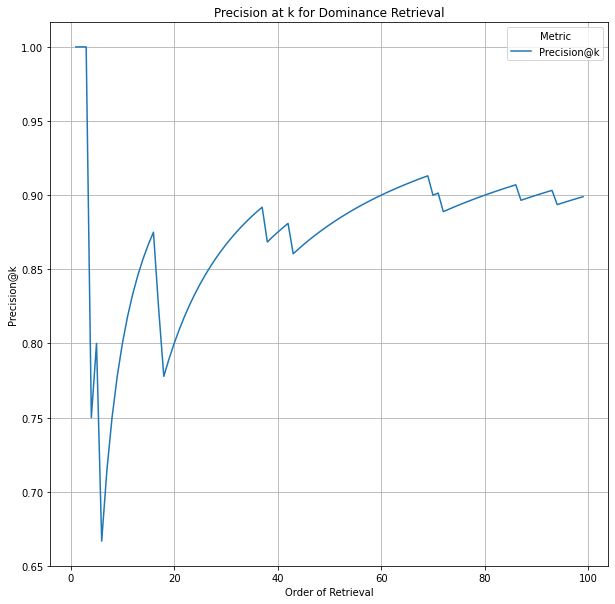

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example data: ranked_items with 1s for relevant items and 0s for non-relevant
ranked_items = DOM.DOM # Extend this list as needed
total_relevant_items = sum(ranked_items)  # Total number of relevant items

# Calculating Precision@k and Recall@k
ks = np.arange(100)  # Different cutoff values
data = []

for k in ks:
    top_k_items = ranked_items[:k]
    tp = sum(top_k_items)  # True positives in top k
    precision_at_k = tp / k
    recall_at_k = tp / total_relevant_items
    data.append({"k": k, "Precision@k": precision_at_k, "Recall@k": recall_at_k})

# Convert to DataFrame for easier plotting
df = pd.DataFrame(data)

# Melting the DataFrame to make it suitable for sns.lineplot()
df_melted = df.melt(
    id_vars=["k"],
    value_vars=["Precision@k"],
    var_name="Metric",
    value_name="Value",
)

# Plotting with Seaborn
plt.figure(figsize=(10, 10))
sns.lineplot(data=df_melted, x="k", y="Value", hue="Metric")

plt.title("Precision at k for Dominance Retrieval")
plt.xlabel("Order of Retrieval")
plt.ylabel("Precision@k")
plt.grid(True)
plt.show()

In [33]:
TOP_100_DOM_HAND = DFS_ISOLATED_CROP.sort_values(by="HAND_DIFF", ascending=False).head(100).HAND.value_counts()

In [30]:
DFS_ISOLATED_CROP.sort_values(by='HAND_DIFF', ascending=True).head(5)

,LEXICON,POS,RIGHT,LEFT,HAND_DIFF,MOV_ID,HAND,PLACE
189,AUT_0,,1.162273,2.985454,-1.823181,1,17,23
2559,TAVA_0,Ad,0.395400,1.594269,-1.198869,1,11,23
3048,ÇAMAŞIR_0,Ad,0.684140,1.833739,-1.149600,2,29,1
3048,ÇAMAŞIR_0,Ad,0.684140,1.833739,-1.149600,1,25,23
1121,GECIKMEK_0,Eylem,0.498260,1.567909,-1.069648,1,28,21


In [26]:
DFS_ISOLATED_CROP.sort_values(by='HAND_DIFF', ascending=True).head(100).HAND.value_counts() / 100

28    0.14
17    0.11
19    0.10
29    0.07
11    0.07
25    0.06
8     0.06
20    0.06
22    0.05
26    0.05
5     0.04
31    0.04
32    0.04
18    0.02
7     0.02
27    0.02
6     0.01
10    0.01
1     0.01
3     0.01
15    0.01
Name: HAND, dtype: float64

        HAND vals
17  0.290909   17
25  0.218182   25
11  0.181818   11
28  0.181818   28
26  0.127273   26


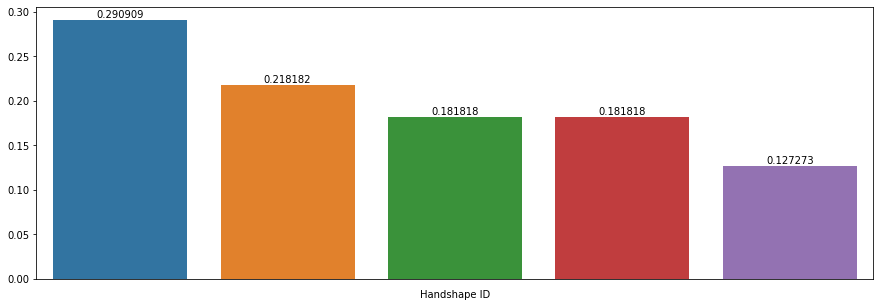

In [ ]:
import seaborn as sns

dist = DFS_ISOLATED_CROP.sort_values(by='HAND_DIFF', ascending=False).head(100).HAND.value_counts()[:5] / DFS_ISOLATED_CROP.sort_values(by='HAND_DIFF', ascending=False).head(100).HAND.value_counts()[:5].sum()

dist = pd.DataFrame(dist)

dist['vals'] = dist.index
print(dist)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
ax = sns.barplot(x="vals", y="HAND", data=dist)
ax.set_xlabel('Handshape ID')
ax.set_ylabel('')

ax.set(xticklabels=[])  # remove the tick labels
ax.tick_params(bottom=False)  # remove the ticks
# 17 , 25 , 11, 28, 26
for i in ax.containers:
    ax.bar_label(i,)

<Axes: >

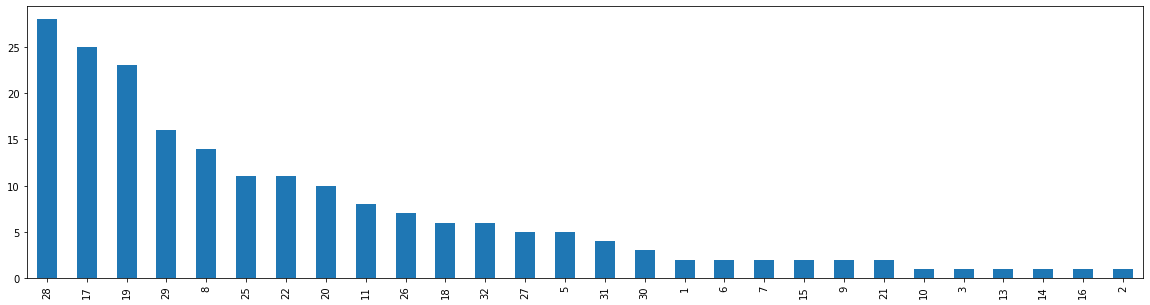

In [ ]:
DFS_ISOLATED.sort_values(by='HAND_DIFF', ascending=True).head(200).HAND.value_counts().plot(kind='bar', figsize=(20,5))

In [ ]:
import requests

for idx in range(1,34):
    resp = requests.get(f'https://tidsozluk.aile.gov.tr/imgz/degiske_el-konum/el/{idx}.png')
    with open(f'hand/{idx}.png', 'wb') as f:
        f.write(resp.content)

### SYMMETRICITY CONDITION

-  Symmetrical movements are also a strategy to show the quantity of objects. (kubuş)

-  Featural Symmetry (or ‘‘Maximize Symmetry’’): The amount of
featural complexity in the construction is reduced by making the two
hands identical in their selected finger combinations, joint
specifications, or both. 

- e “Symmetry Condition” and the “Dominance Condition”
(Battison 1978); therefore, they are not usable as signs. Most letters do not obey the
symmetry condition, and then unmarked handshapes are restricted for the nondominant hand. For instance, in the “A” letter which can be classified as a Type-3
sign, the non-dominant hand has the V-handshape while the dominant hand has the Ihandshape. This condition indicates that this letter sign is an iconic form which may
not be counted as a sign constructed from handshapes in terms of phonemes

In [28]:
DFS_ISOLATED_NONZERO = DFS_ISOLATED[DFS_ISOLATED.RIGHT != 0]
DFS_ISOLATED_NONZERO = DFS_ISOLATED_NONZERO[DFS_ISOLATED_NONZERO.LEFT != 0]

In [29]:
DFS_ISOLATED_NONZERO_RIGHT = DFS_ISOLATED_NONZERO[DFS_ISOLATED_NONZERO.HAND_DIFF > 0]
DFS_ISOLATED_NONZERO_LEFT = DFS_ISOLATED_NONZERO[DFS_ISOLATED_NONZERO.HAND_DIFF < 0]

In [30]:
DFS_ISOLATED_NONZERO_LEFT = DFS_ISOLATED_NONZERO_LEFT.sort_values(by='HAND_DIFF', ascending=False).drop_duplicates(subset='LEXICON')
DFS_ISOLATED_NONZERO_RIGHT = DFS_ISOLATED_NONZERO_RIGHT.sort_values(by='HAND_DIFF', ascending=True).drop_duplicates(subset='LEXICON')

        HAND vals
28  0.296296   28
17  0.259259   17
19  0.185185   19
25  0.129630   25
11  0.129630   11


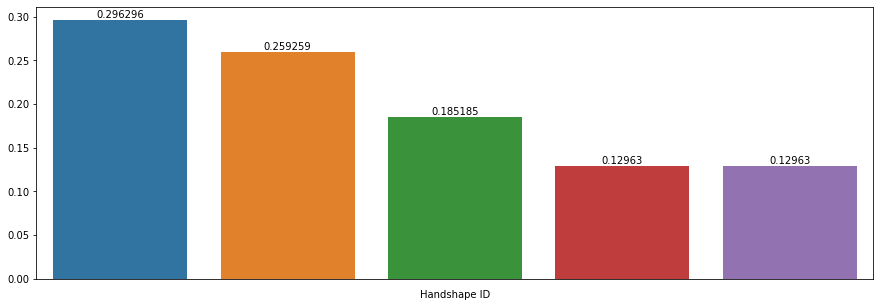

In [31]:
import seaborn as sns

dist = (DFS_ISOLATED_NONZERO_RIGHT.head(100).HAND.value_counts()[:5] / DFS_ISOLATED_NONZERO_RIGHT.head(100).HAND.value_counts()[:5].sum())

dist = pd.DataFrame(dist)

dist['vals'] = dist.index
print(dist)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
ax = sns.barplot(x="vals", y="HAND", data=dist)
ax.set_xlabel('Handshape ID')
ax.set_ylabel('')

ax.set(xticklabels=[])  # remove the tick labels
ax.tick_params(bottom=False)  # remove the ticks
# 28, 17, 19, 25, 11
for i in ax.containers:
    ax.bar_label(i,)

<Axes: >

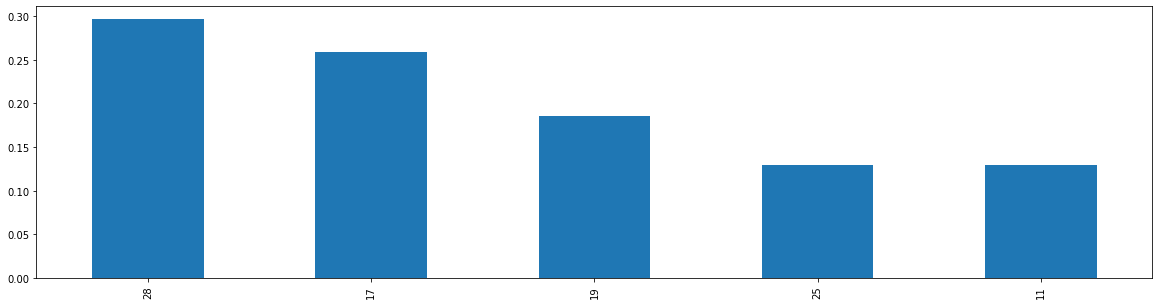

In [32]:
(DFS_ISOLATED_NONZERO_RIGHT.head(100).HAND.value_counts()[:5] / DFS_ISOLATED_NONZERO_RIGHT.head(100).HAND.value_counts()[:5].sum()).plot(kind='bar', figsize=(20,5))

In [48]:
DFS_ISOLATED_NONZERO_LEFT.sort_values(by='HAND_DIFF', ascending=True).head(200).to_excel('left_dominance_200.xlsx', index=False)

In [47]:
DFS_ISOLATED_NONZERO_LEFT.sort_values(by='HAND_DIFF', ascending=True).head(15)

,LEXICON,POS,RIGHT,LEFT,HAND_DIFF,MOV_ID,HAND,PLACE
189,AUT_0,,1.162273,2.985454,-1.823181,1,17,23
2559,TAVA_0,Ad,0.395400,1.594269,-1.198869,1,11,23
3048,ÇAMAŞIR_0,Ad,0.684140,1.833739,-1.149600,1,25,23
1121,GECIKMEK_0,Eylem,0.498260,1.567909,-1.069648,1,28,21
3286,İLKÖĞRETIM_0,Ad,0.679440,1.728644,-1.049204,1,17,23
2333,SAĞ_1,Ad,0.254355,1.278737,-1.024383,2,25,20
2227,REFAKAT ETMEK_0,Eylem,0.701901,1.668431,-0.966530,1,26,21
2785,VARDIYA_0,Ad,0.694901,1.593595,-0.898694,1,8,1
3037,ZORLAMAK_1,Ad,0.511102,1.375398,-0.864296,2,11,1
1030,EZIYET_0,Ad,0.794194,1.653212,-0.859018,1,19,26


In [41]:
import os

os.mkdir('left')

In [45]:
TOP_200 = DFS_ISOLATED_NONZERO_LEFT.sort_values(by='HAND_DIFF', ascending=True).head(200).LEXICON.to_list()
for lex in TOP_200:
    os.system(f'cp "../../data/corpus/{lex}.mp4" -t left/')    


In [33]:
DFS_ISOLATED_NONZERO_RIGHT
# FUTURE WORK: CAN WE PREDICT PART-OF-SPEECH FROM SIGN DIFF 
# CHECK SIGN ANNOTATION (SIGNLAB) - MOUTHING VS MOUTH GESTURE - 

,LEXICON,POS,RIGHT,LEFT,HAND_DIFF,MOV_ID,HAND,PLACE
1861,MEMNUN_0,Sıfat,0.533522,0.533268,0.000254,1,5,14
771,DIKKAT ETMEK_0,Eylem,0.790913,0.789956,0.000957,1,20,8
2195,PRATIK_0,Sıfat,1.219684,1.218586,0.001098,1,11,1
2414,SIRA _0,Ad,0.809407,0.808213,0.001194,2,19,1
1965,NAMAZ_0,Ad,0.718088,0.716674,0.001413,1,19,7
...,...,...,...,...,...,...,...,...
450,BILEME_0,Ad,1.666697,0.511135,1.155563,1,28,23
867,DÖNMEK_1,Eylem,1.931392,0.755349,1.176043,1,22,1
693,DAVUL_0,Ad,1.782061,0.535796,1.246264,1,11,1
2393,SIKMAK_1,Eylem,1.749761,0.310830,1.438931,2,16,26


<Axes: >

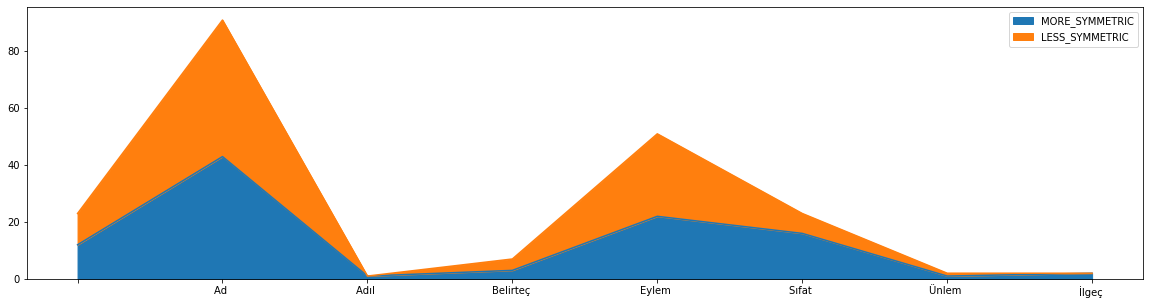

In [37]:
topK = 100
# TODO: Check why adjectives are more symmetric than less (LOOK AT THE VIDEOS)
pd.DataFrame({
    'MORE_SYMMETRIC': DFS_ISOLATED_NONZERO_RIGHT.head(topK).POS.value_counts(),
    'LESS_SYMMETRIC': DFS_ISOLATED_NONZERO_RIGHT.tail(topK).POS.value_counts(),
}).plot(kind='area', figsize=(20,5))

<Axes: >

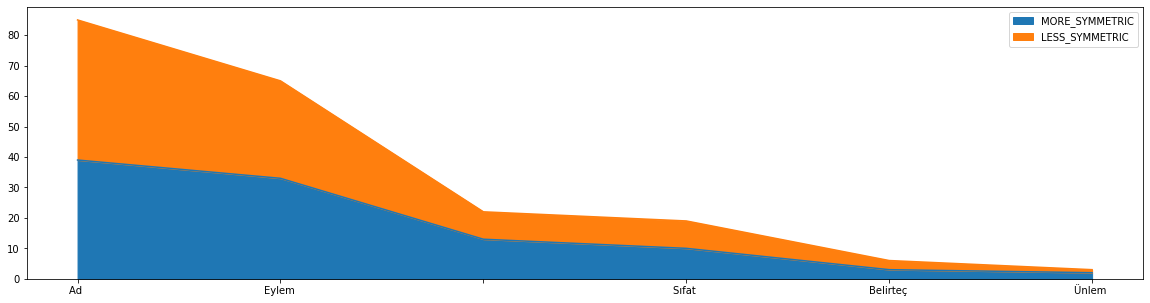

In [150]:
topK = 100
pd.DataFrame({
    'MORE_SYMMETRIC': DFS_ISOLATED_NONZERO_LEFT.head(topK).POS.value_counts(),
    'LESS_SYMMETRIC': DFS_ISOLATED_NONZERO_LEFT.tail(topK).POS.value_counts(),
}).plot(kind='area', figsize=(20,5))

<Axes: >

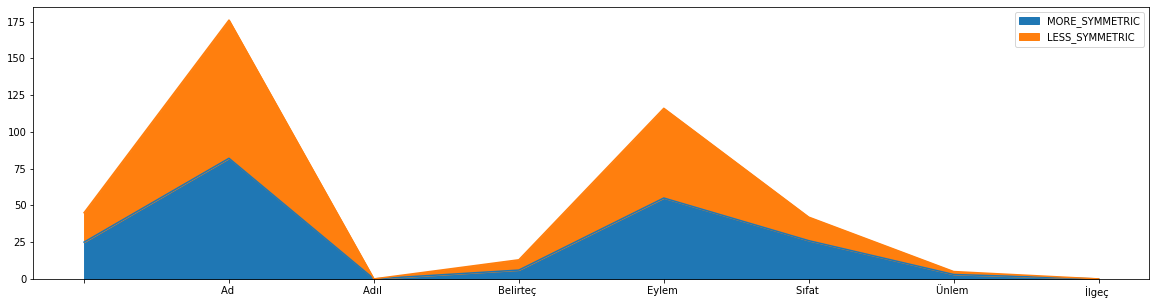

In [152]:
topK = 100
pd.DataFrame({
    'MORE_SYMMETRIC': DFS_ISOLATED_NONZERO_RIGHT.head(topK).POS.value_counts() + DFS_ISOLATED_NONZERO_LEFT.head(topK).POS.value_counts(),
    'LESS_SYMMETRIC': DFS_ISOLATED_NONZERO_RIGHT.tail(topK).POS.value_counts() + DFS_ISOLATED_NONZERO_LEFT.tail(topK).POS.value_counts(),
}).plot(kind='area', figsize=(20,5))